In [1]:
SHOW_PLOT_FLAG = True

In [2]:
import sys

sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from constants import *
import matplotlib.gridspec as gridspec


# Figure 10

## Loading Data

In [3]:
Tphy_wReTx = pd.read_csv('CuratedData/T_Phy_wReTxs.txt', sep='\t')
Tphy_noReTx = pd.read_csv('CuratedData/T_Phy_NoReTxs.txt', sep='\t')

y = 'T_Phy(in ms)'

In [4]:
def change_width(ax, new_value, offset):
    for i, patch in enumerate(ax.patches):
        ax.text(patch.get_x() + 0.3, patch.get_height() + offset, 
                str('{0:.2f}'.format(patch.get_height())),
                       ha='center', va='center', color='#800000',
                fontsize=11, zorder=10)#, rotation=20)
        c_width = patch.get_width()
        diff = c_width - new_value

        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * 0.5)
        if i == 0:
            patch.set_hatch(HATCHES['ITL1'])
            patch.set_edgecolor(colors['ITL1'])
            patch.set_facecolor('none')
        elif i == 1:
            patch.set_hatch(HATCHES['US1'])
            patch.set_edgecolor(colors['US1'])
            patch.set_facecolor('none')
        elif i == 2:
            patch.set_hatch(HATCHES['SPA1_2'])
            patch.set_edgecolor(colors['SPA1_2'])
            patch.set_facecolor('none')
        elif i == 3:
            patch.set_hatch(HATCHES['SPA1_1'])
            patch.set_edgecolor(colors['SPA1_1'])
            patch.set_facecolor('none')


## Plotting Data

Showing Plot  Sec4_Fig10


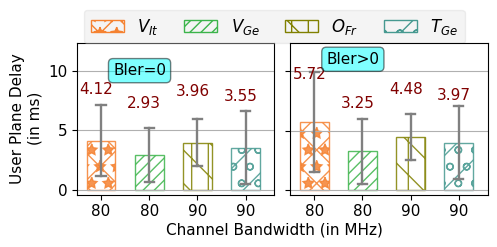

In [5]:
fig = plt.figure(figsize=(5.2, 2))
gs1 = gridspec.GridSpec(1, 2, wspace=0.08, hspace=0.08, top=.99, bottom=0.23, left=0.2, right=0.99, figure=fig)

order=['V_It', 'V_Ge', 'O_Fr','T_Ge']

# Plotting t_Phy BLER = 0
ax0 = plt.subplot(gs1[0])
ax0.yaxis.grid(True, which='major')
ax0.xaxis.grid(True, which='major')

sns.barplot(x='Operators', y=y, ax=ax0, data=Tphy_noReTx,
            capsize=0.19, errorbar='sd', errwidth=1.7, alpha=0.85,
           order=order, estimator=np.mean)
patches = ax0.patches
for i, line in enumerate(ax0.get_lines()):
    newcolor = patches[i // 3].get_facecolor()
    line.set_color('grey')
change_width(ax0, 0.60, 4.3)
ax0.set_ylabel('User Plane Delay(ms)', fontsize=11)
ax0.set_ylim(-0.4, 12.35)
ax0.set_xlim(-0.5,3.6)
ax0.set_yticks([i for i in range(0, 13, 5)])
ax0.set_yticklabels([i for i in range(0, 13, 5)], fontsize=11)
ax0.set_xlabel('', fontsize=13)
ax0.set_xticklabels(['80', '80', '90', '90', ], fontsize=11)
ax0.set_xlabel('Channel Bandwidth (in MHz)', fontsize=11)
ax0.xaxis.set_label_coords(1, -0.18)
ax0.set_ylabel('User Plane Delay\n(in ms)', fontsize=11)
# ax0.yaxis.set_label_coords(-0.2, 0.31)
ax0.text(0.8, 10, 'Bler=0', ha='center', va='center', bbox=dict(facecolor='cyan', alpha=0.5, boxstyle='round'), 
        color='black',fontsize=11, zorder=20)

# Plotting t_Phy BLER = 0
ax1 = plt.subplot(gs1[1])
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')


sns.barplot(x='Operators', y=y, ax=ax1, data=Tphy_wReTx,
            capsize=0.19, errorbar='sd', errwidth=1.7, alpha=0.85,
            order=order, estimator=np.mean)
patches = ax1.patches
for i, line in enumerate(ax1.get_lines()):
    newcolor = patches[i // 3].get_facecolor()
    line.set_color('grey')
change_width(ax1, 0.60, 4)

ax1.set_ylim(-0.4, 12.4)
ax1.set_xlim(-0.5, 3.6)
ax1.set_yticks([i for i in range(0, 13, 5)])
ax1.set_ylabel('', fontsize=11)
ax1.set_xlabel('', fontsize=11)
ax1.set_yticklabels('', fontsize=11)

ax1.set_xticklabels(['80', '80', '90', '90'], fontsize=11)
ax1.text(0.8, 11, 'Bler>0', ha='center', va='center', bbox=dict(facecolor='cyan', alpha=0.5, boxstyle='round'), 
        color='black', fontsize=11, zorder=20)


h1, = plt.bar(-6, 1, edgecolor=colors['ITL1'], facecolor='none', hatch=HATCHES['ITL1'])
h2, = plt.bar(-7, 1, edgecolor=colors['US1'], facecolor='none', hatch=HATCHES['US1'])
h3, = plt.bar(-8, 1, edgecolor=colors['SPA1_2'], facecolor='none', hatch=HATCHES['SPA1_2'])
h4, = plt.bar(-8, 1, edgecolor=colors['SPA1_1'], facecolor='none', hatch=HATCHES['SPA1_1'])

legend1 = ax0.legend((h1,h2, h3, h4), ('$V_{It}$', '$V_{Ge}$', '$O_{Fr}$', '$T_{Ge}$'),
                     prop=dict(weight='bold', size=12),
           loc='upper center', ncol=4, columnspacing=1.5,
           bbox_to_anchor=(1, 1.27), facecolor='#dddddd',
           handlelength=2, framealpha=.3, fontsize = 12, markerscale=2.1)
#### Showing plots
plot_name = 'Fig10'
plotme(plt, " Sec4", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)
